In [28]:
import pandas as pd

In [29]:
%matplotlib notebook

In [30]:
MONTH = '2016-01'

In [31]:
data = pd.read_hdf('/mnt/raw/clean/%s.h5' % MONTH, 'data')

In [32]:
columns = {
    "FFY28016.P01" : "T1_T2_Ratio",
    "TH006RATIO.CPV" : "T12_T3_Ratio",
    
    "3311HS181A.PV" : "Throughput",
    
    "CalcCY03FRC1.CPV" : "T1_Size",
    "CY02FRC1.CPV" : "T2_Size",
    "3313AI531.PV" : "T3_Size",

    "MIY22937.CPV" : "T1_Output",
    "MIY22953.CPV" : "T2_Output",
    "3312FY078.CPV" : "T3_Output",
    
    "SI82603": "P1_Speed",
    "SI82605": "P2_Speed",
    
    "SI22313.PV": "P1_Hz",
    "SI22315.PV": "P2_Hz",
    
    "PI22925.PV": "P1_Pressure",
    "PI22941.PV": "P2_Pressure",
    
    "MIY22937.CPV": "P1_Mass",
    "MIY22953.CPV": "P2_Mass",
    }
dead_columns = ["T1_T2_Ratio", "T12_T3_Ratio", "SN2001.PV", "SN2002.PV", "3311FV380B.PV",
                "CR002RUN", "CR003RUN", "3311FV690B.PV", "3312DI075.PV", "3312DI075A.PV"]

In [33]:
data.rename(columns=columns, inplace=True)
for c in dead_columns:
    del data[c]

In [34]:
day_data = data.loc[pd.Timestamp('2016-01-05') : pd.Timestamp('2016-01-06')]

<IPython.core.display.Javascript object>


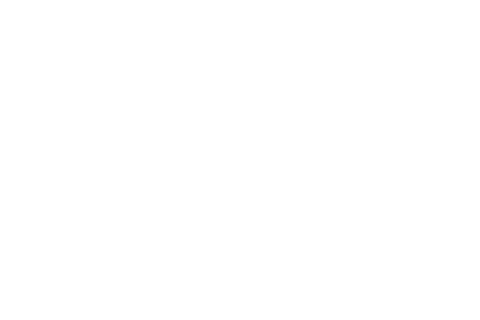

<IPython.core.display.Javascript object>


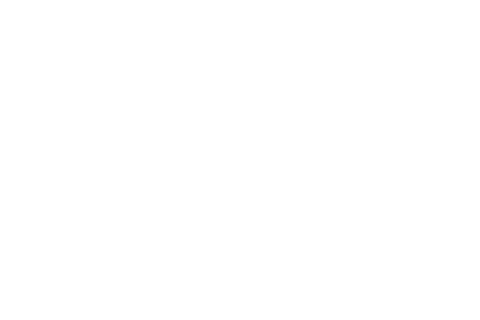

In [35]:
day_data.Throughput.plot()

In [10]:
day_data[["T1_Output", "T2_Output", "T3_Output", "Throughput"]].plot()

KeyError: "['T1_Output' 'T2_Output'] not in index"

<IPython.core.display.Javascript object>


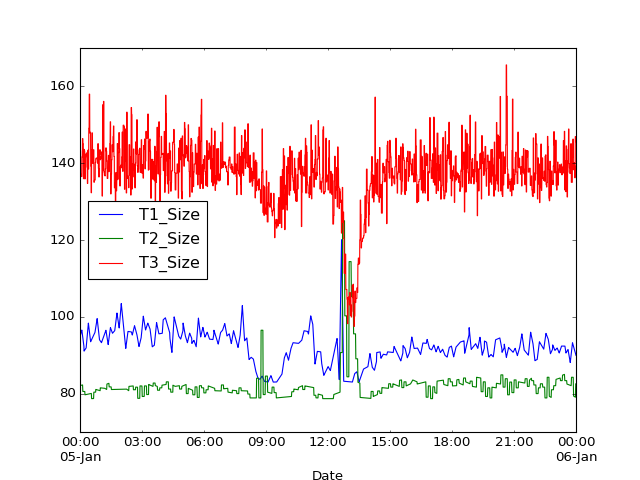

In [11]:
day_data[["T1_Size", "T2_Size", "T3_Size"]].plot()

<IPython.core.display.Javascript object>


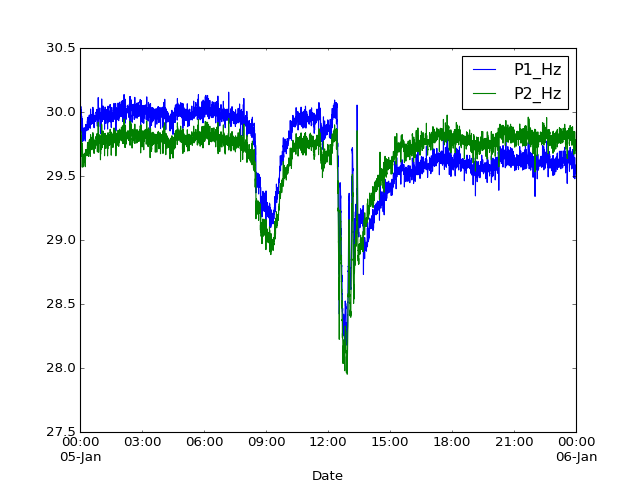

In [12]:
day_data[["P1_Hz", "P2_Hz"]].plot()

<IPython.core.display.Javascript object>


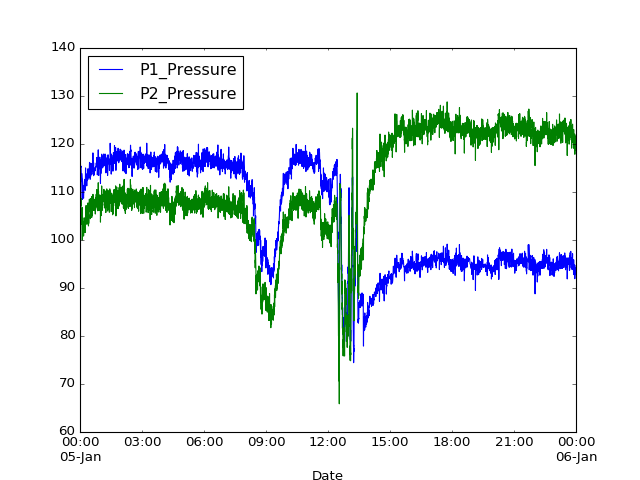

In [13]:
day_data[["P1_Pressure", "P2_Pressure"]].plot()

NonGuiException: 

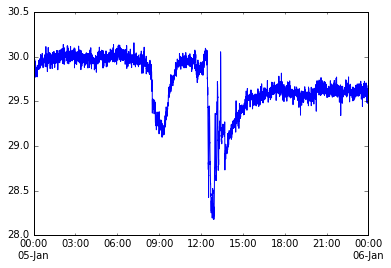

In [27]:
day_data[["P1_Hz", "P2_Hz"]].plot()

<IPython.core.display.Javascript object>


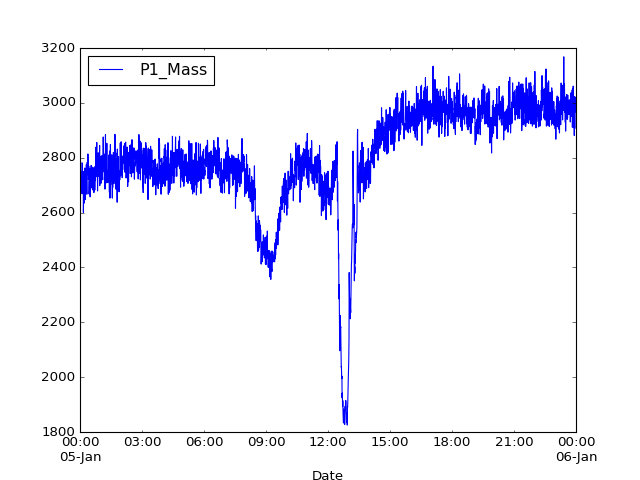

In [20]:
day_data[["P1_Mass"]].plot()

In [136]:
matrix = day_data.corr()
import matplotlib.pyplot as p
p.imshow(matrix)
# p.show()

0
[ 2.43488616  4.85848733  7.27090772 ...,  7.7679864   5.17991672
  2.59134873]


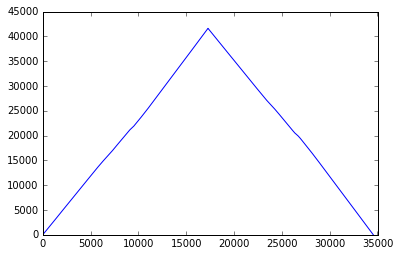

In [26]:
# %matplotlib inline
import scipy.signal as ss
import matplotlib.pyplot as p
N = len(day_data)
c = ss.correlate(day_data["P1_Mass"], day_data["P1_Hz"], mode="full")/(2*N)
print(N  - 1 - c.argmax())
p.plot(c)
# p.show()
print(c)